In [1]:
%pip install tensorflow
                           

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 1.7 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 KB 5.9 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 KB 503.9 kB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [24]:
%pip install transformers

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
%pip install torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 MB 5.9 MB/s eta 0:00:0000:01m00:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.1 MB/s eta 0:00:00a 0:00:01
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.4 MB/s eta 0:00:00a 0:00:01
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import csv
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, BertTokenizer, BertModel, BertConfig
import torch
import re
import os
from torch.utils.data import TensorDataset, DataLoader, Dataset, RandomSampler, SequentialSampler

In [3]:
#set GPUS
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'


In [4]:
MAX_LENS = 200
Batch_size = 16
learning_rate = 5e-5
number_epoch = 5


In [5]:
#build bert model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [6]:
#construct bert model

class bert_model(torch.nn.Module):
    #construct class
    def __init__(self):
        super().__init__()
        self.bert_model = BertModel.from_pretrained('bert-base-uncased')
        self.drop = torch.nn.Dropout(0.3)
        self.out = torch.nn.Linear(768,11)
    
    def forward(self, ids, mask, token_type_ids):
        unw, out = self.bert_model(ids, attention_mask = mask, token_type_ids = token_type_ids)[0], self.bert_model(ids, attention_mask = mask, token_type_ids = token_type_ids)[1]
        #add drop layer
        drop_out = self.drop(out)
        #final layer
        out_final = self.out(drop_out)
        return out_final
    

model_bert = bert_model()
model_bert.to(device)




        
        

bert_model(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_

In [7]:
#get my current path
current_path = os.getcwd()
print(current_path)
file_path_chapter_four = '/Users/wangxuechun/unsw/UNSW-Thesis-/chapter_4_eng_version_one.csv'

/Users/wangxuechun/unsw/UNSW-Thesis-


In [8]:
#load my dataset
df_chapter_four = pd.read_csv(file_path_chapter_four)
df_chapter_four.head()


,English_Verse_chap4_hsien
0,There are said to be some victors who take no ...
1,"Look at Ah Q, light and elated, as if about to..."
2,This victory was not without strange consequen...
3,"""Ah Q, may you die sonless!"""
4,"These words sounded again in Ah Q's cars, and ..."


In [19]:
#store length of each verses
token_len = []
for verses in df_chapter_four.English_Verse_chap4_hsien:
    tokens = tokenizer.encode(verses, max_length=1000)
    token_len.append(len(tokens))

print(len(token_len))
print(token_len)



Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


45
[151, 18, 126, 13, 150, 22, 47, 15, 104, 157, 182, 12, 77, 155, 38, 25, 22, 18, 10, 11, 15, 20, 10, 33, 101, 11, 56, 21, 132, 110, 23, 17, 34, 15, 168, 89, 34, 14, 67, 40, 27, 16, 21, 16, 159]


In [9]:
#plot the distribution of paragraphs lengths
sns.displot(token_len)
plt.xlim([0, 200])
plt.xlabel('Token count')

NameError: name 'token_len' is not defined

In [11]:
#test function
def test():
    model_bert.eval()
    bert_outputs = []

    with torch.no_grad():
        for unw, data in enumerate(test_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model_bert(ids, mask, token_type_ids)

            bert_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())

    return bert_outputs


In [13]:
#construct my data frame
class DatasetParagraphs(Dataset):
    #intialize function
    def __init__ (self, dataset, tokenizer, max_lens):
        self.tokenizer = tokenizer 
        self.dataset = dataset
        self.tweet = dataset['tweets']
        self.targets = self.dataset.list
        self.max_lens = max_lens


    def __len__(self):
        return len(self.tweet)

    #get item
    def __getitem__(self, num):
        tweet = str(self.tweet[num])
        tweet = " ".join(tweet.split())
        inputs = self.tokenizer.encode_plus(
            tweet,
            None, 
            add_special_tokens = True,
            max_length = self.max_lens,
            pad_to_max_length = True,
            return_attention_mask = True
        )

        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs['token_type_ids']

        return {
            'ids' : torch.tensor(ids, dtype = torch.long),
            'mask' : torch.tensor(mask, dtype = torch.long),
            'token_type_ids' : torch.tensor(token_type_ids, dtype= torch.long),
            'targets' : torch.tensor(self.targets[num], dtype = torch.float)
        }

    


In [14]:
#sentiment analysis

#part 1: the sentiment analysis of hsien version


#load data frame and create a dataframe for sentiment analysis
df_hsien = pd.DataFrame()
df_hsien['tweets'] = df_chapter_four["English_Verse_chap4_hsien"]
values = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]] * len(df_chapter_four)
df_hsien['list'] = values



#custom my dataset
dataset_new = DatasetParagraphs(df_hsien, tokenizer, MAX_LENS)
param = {'batch_size' : 1,
        'shuffle' : False,
        'num_workers' : 0
}

test_loader = DataLoader(dataset_new, **param)
test_outputs = test()

#we got the test outputs values
test_outputs = np.array(test_outputs)

for i in range(test_outputs.shape[0]):
    for j in range(test_outputs.shape[1]):
        if test_outputs[i][j] >= 0.5:
            test_outputs[i][j] = 1
        else:
            test_outputs[i][j] = 0

df_hsien['Optimistic'] = "None"
df_hsien['Thankful'] = "None"
df_hsien['Empathetic'] = "None"
df_hsien['Pessimistic'] = "None"
df_hsien['Anxious'] = "None"
df_hsien['Sad'] = "None"
df_hsien['Annoyed'] = "None"
df_hsien['Denial'] = "None"
df_hsien['Official report'] = "None"
df_hsien['Surprise'] = "None"
df_hsien['Joking'] = "None"


for i in range(len(test_outputs)):
    df_hsien['Optimistic'].iloc[i] = test_outputs[i][0]
    df_hsien['Thankful'].iloc[i] = test_outputs[i][1]
    df_hsien['Empathetic'].iloc[i] = test_outputs[i][2]
    df_hsien['Pessimistic'].iloc[i] = test_outputs[i][3]
    df_hsien['Anxious'].iloc[i] = test_outputs[i][4]
    df_hsien['Sad'].iloc[i] = test_outputs[i][5]
    df_hsien['Annoyed'].iloc[i] = test_outputs[i][6]
    df_hsien['Denial'].iloc[i] = test_outputs[i][7]
    df_hsien['Official report'].iloc[i] = test_outputs[i][8]
    df_hsien['Surprise'].iloc[i] = test_outputs[i][9]
    df_hsien['Joking'].iloc[i] = test_outputs[i][10]

#deep clean the dataframe
df_hsien = df_hsien.drop(['list','Official report'], axis = 1)
df_count_hsien = pd.DataFrame()

df_count_hsien = pd.DataFrame(index=[0], columns=['Optimistic', 'Thankful', 'Empathetic', 'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Surprise', 'Joking'])
df_count_hsien[:] = "None"

# Define a function to count 1.0 in columns
def count_ones(column):
    return (df_hsien[column] == 1.0).sum()

# Use the function to count and assign values
df_count_hsien['Optimistic'] = count_ones('Optimistic')
df_count_hsien['Thankful'] = count_ones('Thankful')
df_count_hsien['Empathetic'] = count_ones('Empathetic')
df_count_hsien['Pessimistic'] = count_ones('Pessimistic')
df_count_hsien['Anxious'] = count_ones('Anxious')
df_count_hsien['Sad'] = count_ones('Sad')
df_count_hsien['Annoyed'] = count_ones('Annoyed')
df_count_hsien['Denial'] = count_ones('Denial')
df_count_hsien['Surprise'] = count_ones('Surprise')
df_count_hsien['Joking'] = count_ones('Joking')

print(df_count_hsien.head())







Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/pyth

   Optimistic  Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  \
0           1         2          34           14       43    3       40   

   Denial  Surprise  Joking  
0      45        39      37  


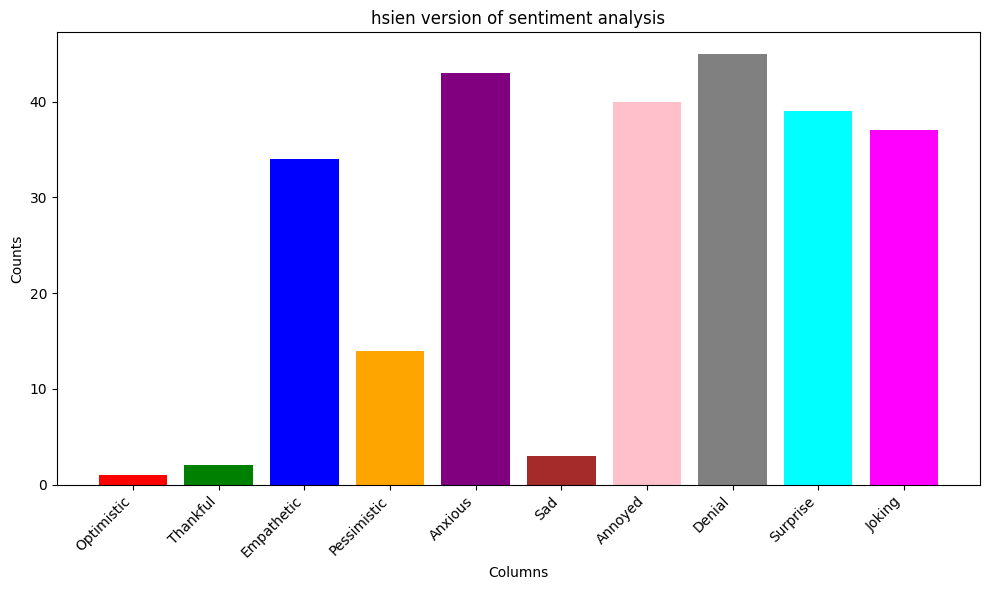

In [16]:
# Assuming df_count_hsien is your DataFrame and it contains one row with the counts of 1.0 in each column
# Convert the counts to numeric values, just in case they're not
df_count_hsien_numeric = df_count_hsien.iloc[0].apply(pd.to_numeric)

# Define a list of colors (the length should match the number of categories/columns)
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Check if the number of colors matches the number of columns
if len(colors) >= len(df_count_hsien_numeric):
    # Plotting
    plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
    plt.bar(df_count_hsien_numeric.index, df_count_hsien_numeric.values, color=colors)  # Create a bar plot with different colors

    # Adding titles and labels
    plt.title('hsien version of sentiment analysis in chapter 4')
    plt.xlabel('Columns')
    plt.ylabel('Counts')
    plt.xticks(rotation=45, ha='right')  # Rotate the x labels to avoid overlapping

    # Show the plot
    plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.show()
else:
    print("Not enough colors defined.")




In [17]:
#google translate chapter four sentiment analysis


#clean the new dataset
#get the file path for the google translate version
file_path_four_google = '/Users/wangxuechun/unsw/UNSW-Thesis-/chapter_4_trans.csv'
#construct a dataframe
df_four_google = pd.read_csv(file_path_four_google)
#drop the Chinese_verse, and keep the translated English Verse
# Assuming df is your DataFrame and 'ColumnToDrop' is the name of the column you want to drop
df_four_google = df_four_google.drop('Chinese_verse', axis=1)

df_four_google.head()



,English_Verse
0,Some people say: Some winners are willing to b...
1,"Seeing, he seemed to be flying!"
2,"However, this victory made him a little strang..."
3,"""Broken son's grandson Q!"""
4,This sentence was heard in A Q's ears.He thoug...


In [18]:
#part 2: sentiment analysis for google translation version

#load data frame and create a dataframe for sentiment analysis
df_google = pd.DataFrame()
df_google['tweets'] = df_four_google["English_Verse"]
values_google_four = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]] * len(df_google)
df_google['list'] = values_google_four



#custom my dataset
dataset_new_google = DatasetParagraphs(df_google, tokenizer, MAX_LENS)

test_loader = DataLoader(dataset_new_google, **param)
test_outputs_google = test()

#we got the test outputs values
test_outputs_google = np.array(test_outputs_google)

for i in range(test_outputs_google.shape[0]):
    for j in range(test_outputs_google.shape[1]):
        if test_outputs_google[i][j] >= 0.5:
            test_outputs_google[i][j] = 1
        else:
            test_outputs_google[i][j] = 0

df_google['Optimistic'] = "None"
df_google['Thankful'] = "None"
df_google['Empathetic'] = "None"
df_google['Pessimistic'] = "None"
df_google['Anxious'] = "None"
df_google['Sad'] = "None"
df_google['Annoyed'] = "None"
df_google['Denial'] = "None"
df_google['Official report'] = "None"
df_google['Surprise'] = "None"
df_google['Joking'] = "None"


for i in range(len(test_outputs_google)):
    df_google['Optimistic'].iloc[i] = test_outputs_google[i][0]
    df_google['Thankful'].iloc[i] = test_outputs_google[i][1]
    df_google['Empathetic'].iloc[i] = test_outputs_google[i][2]
    df_google['Pessimistic'].iloc[i] = test_outputs_google[i][3]
    df_google['Anxious'].iloc[i] = test_outputs_google[i][4]
    df_google['Sad'].iloc[i] = test_outputs_google[i][5]
    df_google['Annoyed'].iloc[i] = test_outputs_google[i][6]
    df_google['Denial'].iloc[i] = test_outputs_google[i][7]
    df_google['Official report'].iloc[i] = test_outputs_google[i][8]
    df_google['Surprise'].iloc[i] = test_outputs_google[i][9]
    df_google['Joking'].iloc[i] = test_outputs_google[i][10]

#deep clean the dataframe
df_google = df_google.drop(['list','Official report'], axis = 1)
df_count_google = pd.DataFrame()

df_count_google = pd.DataFrame(index=[0], columns=['Optimistic', 'Thankful', 'Empathetic', 'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Surprise', 'Joking'])
df_count_google[:] = "None"

# Define a function to count 1.0 in columns
def count_google(column):
    return (df_google[column] == 1.0).sum()

# Use the function to count and assign values
df_count_google['Optimistic'] = count_google('Optimistic')
df_count_google['Thankful'] = count_google('Thankful')
df_count_google['Empathetic'] = count_google('Empathetic')
df_count_google['Pessimistic'] = count_google('Pessimistic')
df_count_google['Anxious'] = count_google('Anxious')
df_count_google['Sad'] = count_google('Sad')
df_count_google['Annoyed'] = count_google('Annoyed')
df_count_google['Denial'] = count_google('Denial')
df_count_google['Surprise'] = count_google('Surprise')
df_count_google['Joking'] = count_google('Joking')

print(df_count_google.head())


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


   Optimistic  Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  \
0           0         0          36           12       43    6       44   

   Denial  Surprise  Joking  
0      45        39      42  


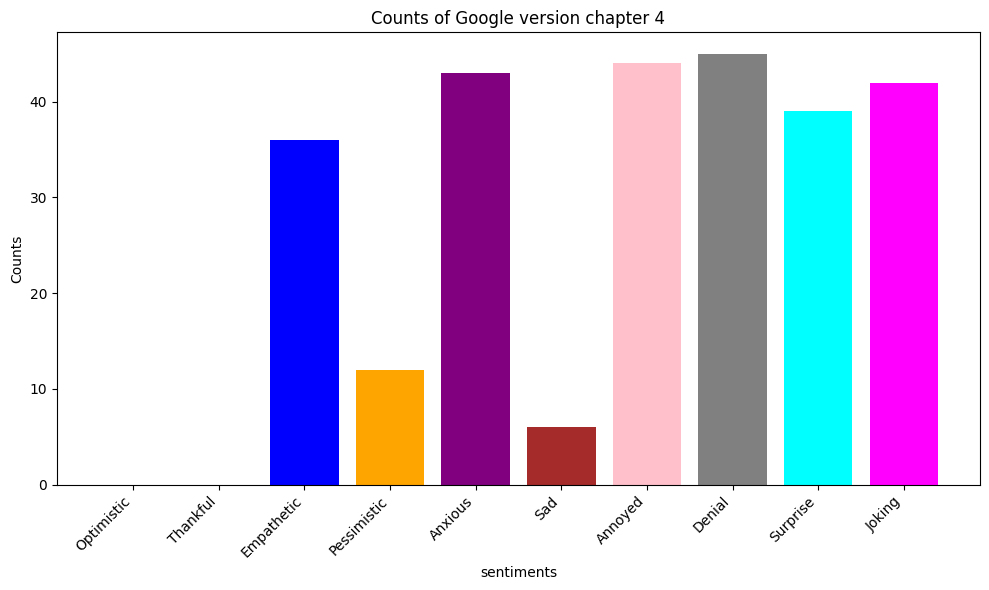

In [25]:
df_count_google_numeric = df_count_google.iloc[0].apply(pd.to_numeric)

# Define a list of colors (the length should match the number of categories/columns)
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Check if the number of colors matches the number of columns
if len(colors) >= len(df_count_google_numeric):
    # Plotting
    plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
    plt.bar(df_count_google_numeric.index, df_count_google_numeric.values, color=colors)  # Create a bar plot with different colors

    # Adding titles and labels
    plt.title('Google version of sentiment analysis in chapter 4')
    plt.xlabel('sentiments')
    plt.ylabel('Counts')
    plt.xticks(rotation=45, ha='right')  # Rotate the x labels to avoid overlapping

    # Show the plot
    plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.show()
else:
    print("Not enough colors defined.")

In [20]:
#google translate chapter four sentiment analysis


#clean the new dataset
#get the file path for the google translate version
file_path_four_yiyun = '/Users/wangxuechun/unsw/UNSW-Thesis-/chapter_4_eng_version_yiyun.csv'
#construct a dataframe
df_four_yiyun = pd.read_csv(file_path_four_yiyun)

df_four_yiyun.head()

,English_Verse_chap4_yiyun
0,"There are, it is said, some victors who deligh..."
1,See him now: walking on air after a busy day o...
2,‘May you die without descendants!’ echoed in t...
3,‘Woman...’ he thought. ‘Must... find... woman...
4,"‘Sauce for the goose...’ he thought some more,..."


In [21]:
#part 3 the sentiment analysis for yiyun

#load data frame and create a dataframe for sentiment analysis
df_yiyun = pd.DataFrame()
df_yiyun['tweets'] = df_four_yiyun["English_Verse_chap4_yiyun"]
values_yiyun_four = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]] * len(df_yiyun)
df_yiyun['list'] = values_yiyun_four



#custom my dataset
dataset_new_yiyun = DatasetParagraphs(df_yiyun, tokenizer, MAX_LENS)

test_loader = DataLoader(dataset_new_yiyun, **param)
test_outputs_yiyun= test()

#we got the test outputs values
test_outputs_yiyun = np.array(test_outputs_yiyun)

for i in range(test_outputs_yiyun.shape[0]):
    for j in range(test_outputs_yiyun.shape[1]):
        if test_outputs_yiyun[i][j] >= 0.5:
            test_outputs_yiyun[i][j] = 1
        else:
            test_outputs_yiyun[i][j] = 0

df_yiyun['Optimistic'] = "None"
df_yiyun['Thankful'] = "None"
df_yiyun['Empathetic'] = "None"
df_yiyun['Pessimistic'] = "None"
df_yiyun['Anxious'] = "None"
df_yiyun['Sad'] = "None"
df_yiyun['Annoyed'] = "None"
df_yiyun['Denial'] = "None"
df_yiyun['Official report'] = "None"
df_yiyun['Surprise'] = "None"
df_yiyun['Joking'] = "None"


for i in range(len(test_outputs_yiyun)):
    df_yiyun['Optimistic'].iloc[i] = test_outputs_yiyun[i][0]
    df_yiyun['Thankful'].iloc[i] = test_outputs_yiyun[i][1]
    df_yiyun['Empathetic'].iloc[i] = test_outputs_yiyun[i][2]
    df_yiyun['Pessimistic'].iloc[i] = test_outputs_yiyun[i][3]
    df_yiyun['Anxious'].iloc[i] = test_outputs_yiyun[i][4]
    df_yiyun['Sad'].iloc[i] = test_outputs_yiyun[i][5]
    df_yiyun['Annoyed'].iloc[i] = test_outputs_yiyun[i][6]
    df_yiyun['Denial'].iloc[i] = test_outputs_yiyun[i][7]
    df_yiyun['Official report'].iloc[i] = test_outputs_yiyun[i][8]
    df_yiyun['Surprise'].iloc[i] = test_outputs_yiyun[i][9]
    df_yiyun['Joking'].iloc[i] = test_outputs_yiyun[i][10]

#deep clean the dataframe
df_yiyun = df_yiyun.drop(['list','Official report'], axis = 1)
df_count_yiyun = pd.DataFrame()

df_count_yiyun = pd.DataFrame(index=[0], columns=['Optimistic', 'Thankful', 'Empathetic', 'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Surprise', 'Joking'])
df_count_yiyun[:] = "None"

# Define a function to count 1.0 in columns
def count_yiyun(column):
    return (df_yiyun[column] == 1.0).sum()

# Use the function to count and assign values
df_count_yiyun['Optimistic'] = count_yiyun('Optimistic')
df_count_yiyun['Thankful'] = count_yiyun('Thankful')
df_count_yiyun['Empathetic'] = count_yiyun('Empathetic')
df_count_yiyun['Pessimistic'] = count_yiyun('Pessimistic')
df_count_yiyun['Anxious'] = count_yiyun('Anxious')
df_count_yiyun['Sad'] = count_yiyun('Sad')
df_count_yiyun['Annoyed'] = count_yiyun('Annoyed')
df_count_yiyun['Denial'] = count_yiyun('Denial')
df_count_yiyun['Surprise'] = count_yiyun('Surprise')
df_count_yiyun['Joking'] = count_yiyun('Joking')

print(df_count_yiyun.head())



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


   Optimistic  Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  \
0           0         0          30           15       41    0       39   

   Denial  Surprise  Joking  
0      41        38      33  


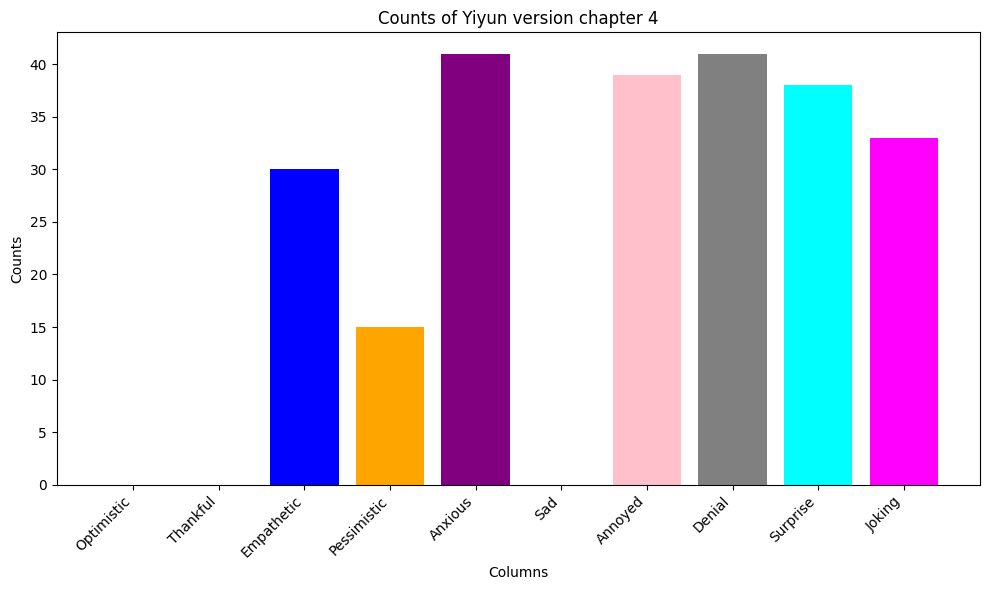

In [22]:
df_count_yiyun_numeric = df_count_yiyun.iloc[0].apply(pd.to_numeric)

# Define a list of colors (the length should match the number of categories/columns)
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Check if the number of colors matches the number of columns
if len(colors) >= len(df_count_yiyun_numeric):
    # Plotting
    plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
    plt.bar(df_count_yiyun_numeric.index, df_count_yiyun_numeric.values, color=colors)  # Create a bar plot with different colors

    # Adding titles and labels
    plt.title('Yiyun version of sentiment analysis in chapter 4')
    plt.xlabel('sentiments')
    plt.ylabel('Counts')
    plt.xticks(rotation=45, ha='right')  # Rotate the x labels to avoid overlapping

    # Show the plot
    plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.show()
else:
    print("Not enough colors defined.")



In [23]:
#conbine the counts of sentimental elements 

df_total_chap4 = pd.DataFrame()

df_total_chap4 = pd.concat([df_count_hsien, df_count_google, df_count_yiyun], axis=0)

df_total_chap4



,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Surprise,Joking
0,1,2,34,14,43,3,40,45,39,37
0,0,0,36,12,43,6,44,45,39,42
0,0,0,30,15,41,0,39,41,38,33


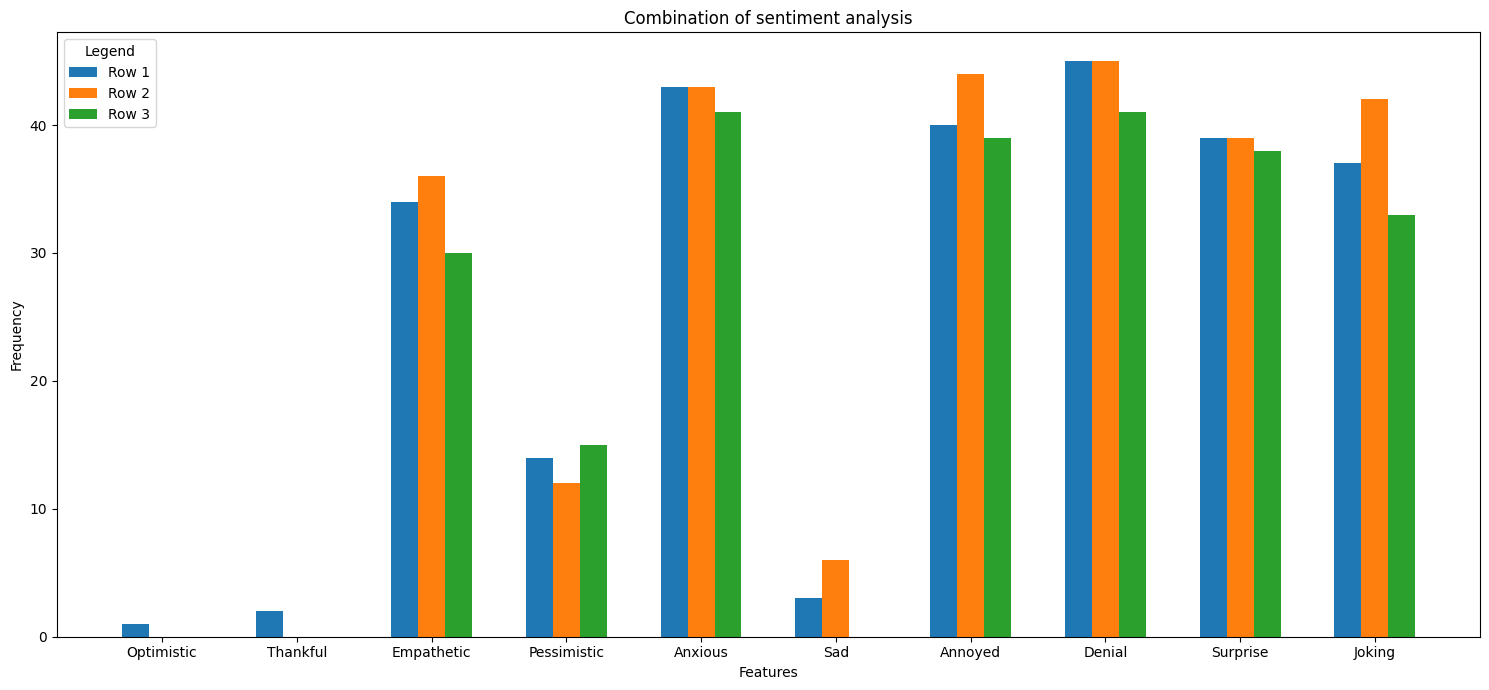

In [24]:
# Number of rows in the DataFrame
num_rows = df_total_chap4.shape[0]
# Number of columns (features) in the DataFrame
num_columns = df_total_chap4.shape[1]
# Create an array with the position of each bar along the x-axis
bar_positions = np.arange(num_columns)

# Set the width of each bar
bar_width = 0.2

# Plotting
plt.figure(figsize=(15, 7))

# Plot a bar for each row
for i in range(num_rows):
    plt.bar(bar_positions + i * bar_width, df_total_chap4.iloc[i, :], width=bar_width, label=f'Row {i+1}')

# Set the position and labels for the x-axis ticks
plt.xticks(bar_positions + bar_width, df_total_chap4.columns)

# Adding titles and labels
plt.title('Combination of sentiment analysis in chapter 4')
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.legend(title="Legend")  # Show legend with title

# Show the plot
plt.tight_layout()  # Adjust subplot parameters to give specified padding.
plt.show()